## Loading Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [2]:
#1
df = pd.read_csv('https://raw.githubusercontent.com/JoycelineAS/DATASET_DATAMINING/refs/heads/main/bread%20basket.csv')
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [3]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
#3 check missing values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a _________________________. (fill that blank on the section below)

The overview reveals a complete dataset with no missing values across any of the columns, containing a total of 20,507 entries. It provides detailed information about individual transactions, including the item purchased, the date and time of purchase, the period of the day (morning, afternoon, evening, night), and whether the transaction occurred on a weekday or weekend. This structure offers a comprehensive view of the sales data, making it suitable for further analysis, such as identifying trends, patterns, and insights related to customer behavior and product popularity across different times.

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-6d38fa0d34f7>:5: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


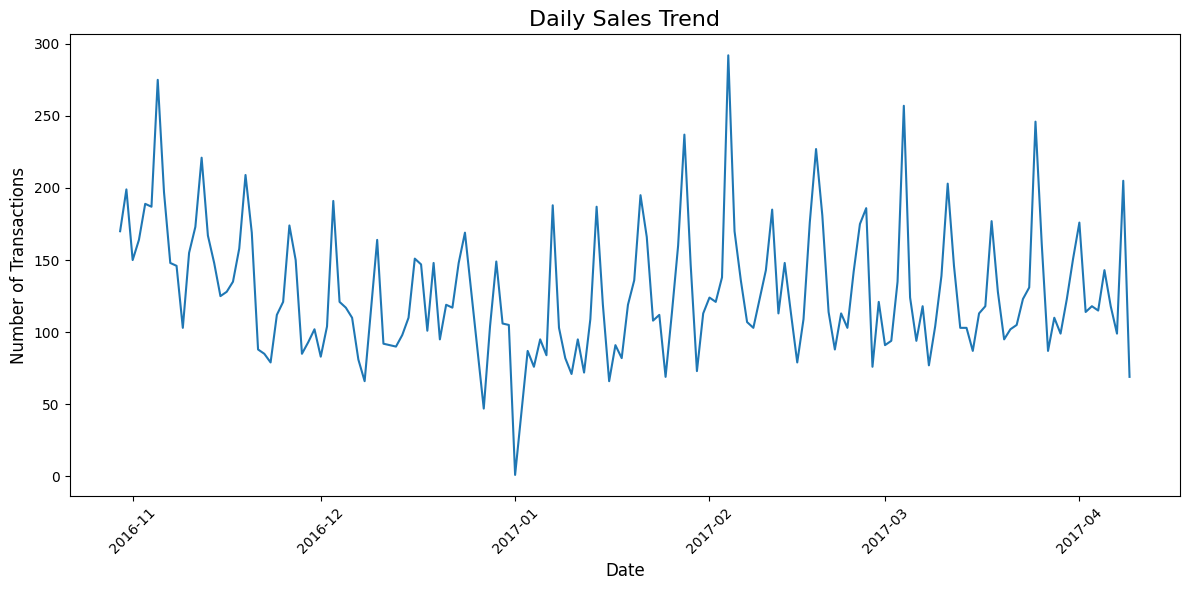

In [7]:
# 5
import pandas as pd
import matplotlib.pyplot as plt

df['date_time'] = pd.to_datetime(df['date_time'])

df['date'] = df['date_time'].dt.date

daily_transactions = df.groupby('date').size()


plt.figure(figsize=(12, 6))
plt.plot(daily_transactions.index, daily_transactions.values, marker='', linestyle='-')
plt.title('Daily Sales Trend', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [8]:
# 6
df['date_time'] = pd.to_datetime(df['date_time'])


df['day'] = df['date_time'].dt.day
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['time'] = df['date_time'].dt.time
df['hour'] = df['date_time'].dt.hour
df['day_name'] = df['date_time'].dt.day_name()

df.sample(5)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,date,day,month,year,time,hour,day_name
3601,1750,Bread,2016-11-20 11:46:00,morning,weekend,2016-11-20,20,11,2016,11:46:00,11,Sunday
19131,9061,Bakewell,2017-03-30 12:02:00,afternoon,weekday,2017-03-30,30,3,2017,12:02:00,12,Thursday
4019,1964,Coffee,2016-11-24 11:39:00,morning,weekday,2016-11-24,24,11,2016,11:39:00,11,Thursday
13463,6563,Sandwich,2017-02-14 13:08:00,afternoon,weekday,2017-02-14,14,2,2017,13:08:00,13,Tuesday
1049,519,Hot chocolate,2016-11-04 17:52:00,evening,weekday,2016-11-04,4,11,2016,17:52:00,17,Friday



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


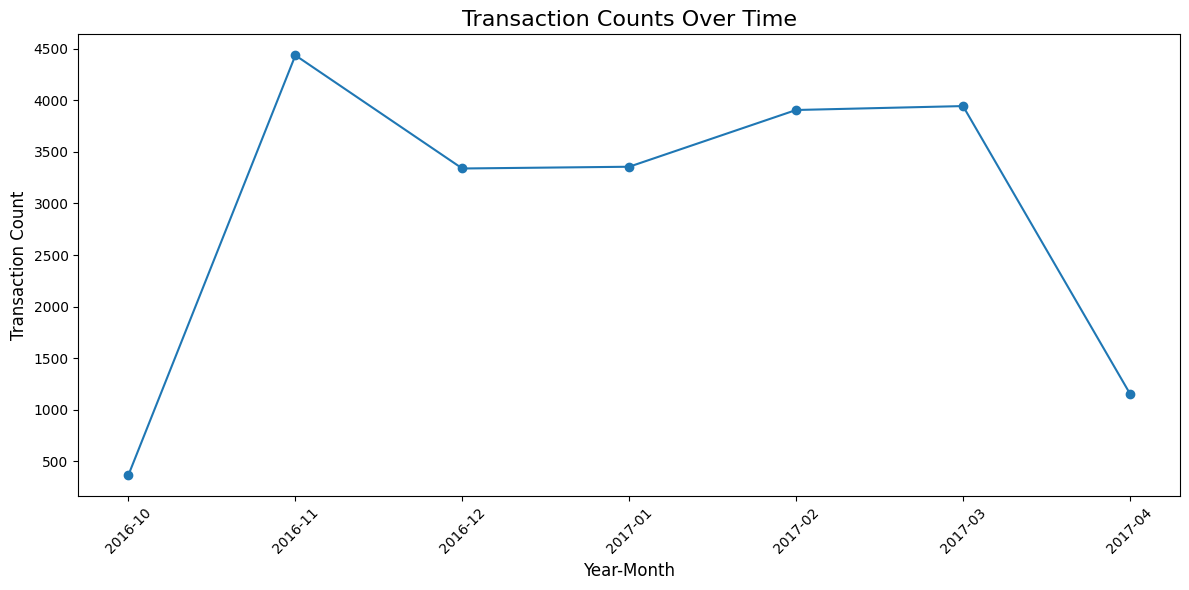

In [9]:
# 7
df['date_time'] = pd.to_datetime(df['date_time'])

df['year_month'] = df['date_time'].dt.to_period('M')

monthly_transactions = df.groupby('year_month').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_transactions.index.astype(str), monthly_transactions.values, marker='o', linestyle='-')
plt.title('Transaction Counts Over Time', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Transaction Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


8. Now, the visualization above provides better insights: _________________________. (fill that blank on the section below)

Now, the visualization above provides better insights: it highlights the monthly sales trends, showing peaks and drops in transaction counts over time. For instance, there is a sharp increase in transactions in October 2016, followed by fluctuations with consistent activity from December 2016 to March 2017, and a noticeable decline in April 2017. This pattern can help identify seasonal trends or specific months with higher customer engagement.


Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [10]:
#9
df['date_time'] = pd.to_datetime(df['date_time'])
df['day_name'] = df['date_time'].dt.day_name()

df['weekday_weekend'] = df['day_name'].map(
    lambda x: 'weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'weekend'
)

unique_weekdays = df.loc[df['weekday_weekend'] == 'weekday', 'day_name'].unique()
unique_weekends = df.loc[df['weekday_weekend'] == 'weekend', 'day_name'].unique()

print("Unique weekday names:", unique_weekdays)
print("Unique weekend names:", unique_weekends)


Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [11]:
#10

df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month
df['day_name'] = df['date_time'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

aggregation = df.groupby(['month', 'day_name']).size().unstack(fill_value=0)

aggregation = aggregation[day_order]

aggregation

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
month,,,,,,,
1,329,474,322,399,489,807,536
2,474,429,419,456,599,879,650
3,379,433,459,557,674,883,559
4,118,115,143,118,99,381,183
10,199,0,0,0,0,0,170
11,469,599,576,591,639,879,683
12,356,342,402,525,624,776,314


11. Wow, it turns out the insight that can be gained from the table above is _____

Wow, it turns out the insight that can be gained from the table above is how transaction patterns vary by day of the week and month. For instance, weekends (Saturday and Sunday) consistently show higher transaction counts compared to weekdays, indicating higher customer activity on weekends. Additionally, certain months, like February and March, exhibit peak transaction counts, while others, like April, show significantly lower activity. This can help in identifying seasonal trends and planning resources or promotions accordingly.



It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


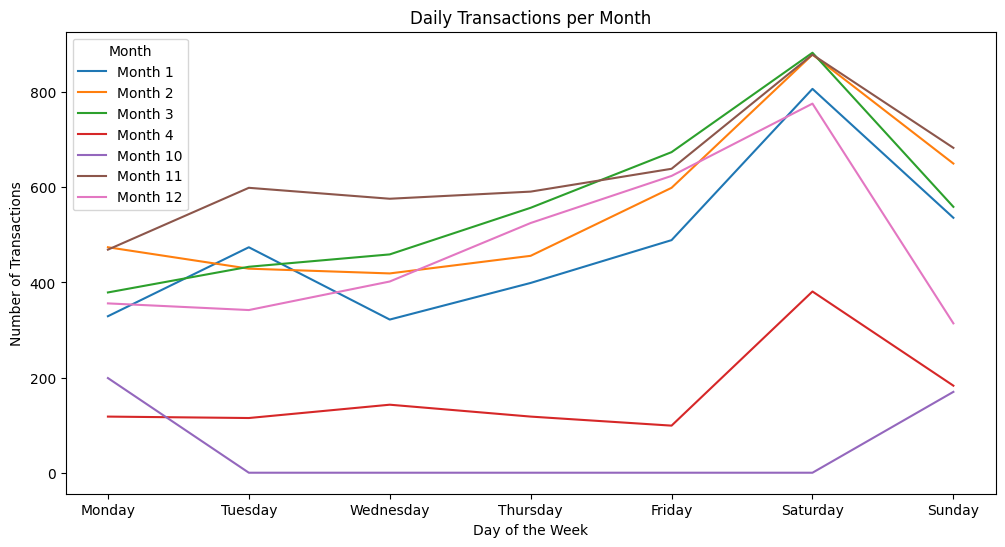

In [12]:
# 12
df['date_time'] = pd.to_datetime(df['date_time'])
df['month'] = df['date_time'].dt.month
df['day_name'] = df['date_time'].dt.day_name()

day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

aggregation = df.groupby(['month', 'day_name']).size().unstack(fill_value=0)

aggregation = aggregation[day_order]

plt.figure(figsize=(12, 6))
for month in aggregation.index:
    plt.plot(aggregation.columns, aggregation.loc[month], label=f'Month {month}')

plt.title('Daily Transactions per Month')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.legend(title='Month')
plt.show()


13. Wow, after visualizing it like this, I can gain insights into the sales trends that ____.


Wow, after visualizing it like this, I can gain insights into the sales trends that show how transaction volumes fluctuate across different days of the week for each month. For example, weekends (Saturday and Sunday) tend to have higher transaction counts compared to weekdays, and certain months, such as December, exhibit spikes in sales, potentially indicating seasonal or holiday-related increases. This helps identify patterns and can guide business strategies for optimizing staffing, promotions, or inventory management on high-traffic days.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [13]:
# 14
unique_periods = df['period_day'].unique()

unique_periods


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['morning', 'afternoon', 'evening', 'night'], dtype=object)

Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [14]:
# 15
df['hour'] = pd.to_datetime(df['date_time']).dt.hour

morning_hours = df[df['hour'].between(7, 11)]['hour'].unique()
afternoon_hours = df[df['hour'].between(12, 16)]['hour'].unique()
evening_hours = df[df['hour'].between(17, 20)]['hour'].unique()
night_hours = df[df['hour'].between(21, 23)]['hour'].unique()

print("Unique morning_hour:", morning_hours)
print("Unique afternoon_hour:", afternoon_hours)
print("Unique evening_hour:", evening_hours)
print("Unique night_hour:", night_hours)

Unique morning_hour: [ 9 10 11  8  7]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

Yes, I noticed something odd in the results. The morning_hours array includes the value [1], which is unexpected because the morning period typically refers to hours between 7 AM to 11 AM, while 1 corresponds to 1 AM, which is part of the night period. This suggests that there might be an issue with the data categorization, possibly due to a misformatted or incorrectly parsed time value. The hour 1 should be classified as part of the night range, not the morning. This discrepancy can be fixed by ensuring that the categorization logic properly handles each hour's correct time range.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


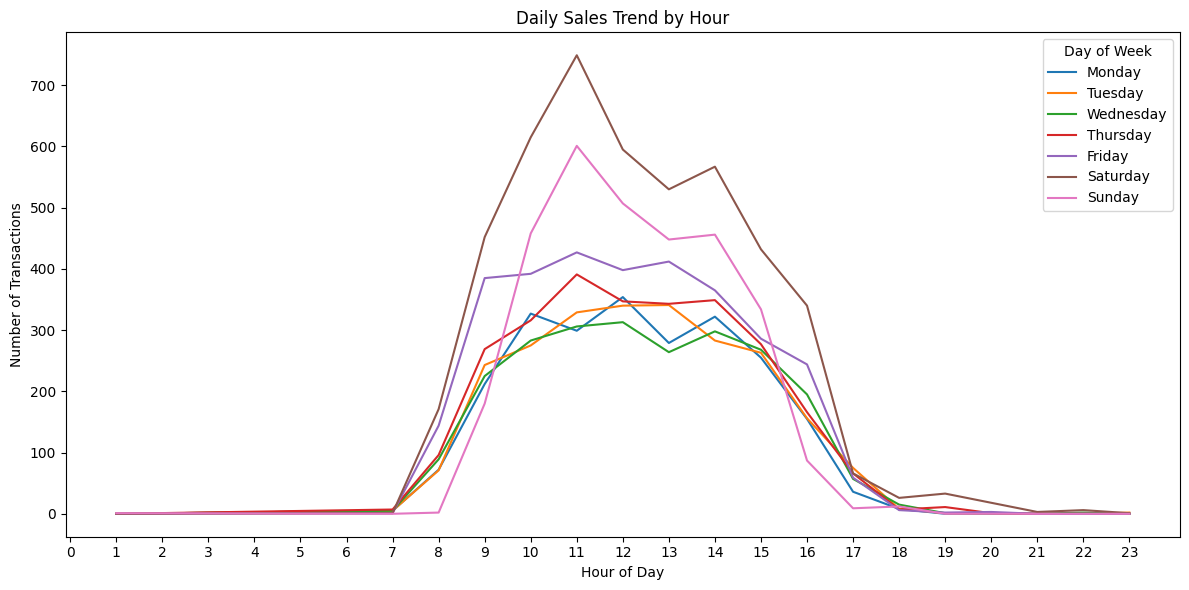

In [15]:
# 17
daily_hourly_sales = df.groupby(['day_name', 'hour'])['Transaction'].count().reset_index()

daily_hourly_sales = daily_hourly_sales.pivot(index='hour', columns='day_name', values='Transaction').fillna(0)

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_hourly_sales = daily_hourly_sales[days_order]

daily_hourly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Daily Sales Trend by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(24))
plt.legend(title='Day of Week')
plt.tight_layout()
plt.show()

18. The daily sales trend plot reveals that _______

> Add blockquote



The daily sales trend plot reveals that transactions typically peak during mid-morning to early afternoon hours, with noticeable variations across different days of the week. Weekends often show higher transaction volumes compared to weekdays, suggesting increased customer activity during leisure periods.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


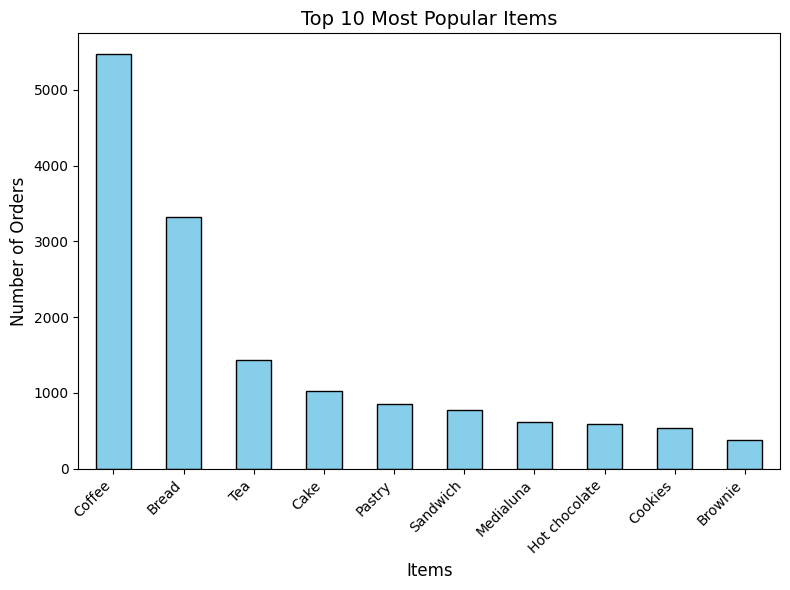

In [16]:
# 19
item_counts = df['Item'].value_counts().head(10)

plt.figure(figsize=(8, 6))
item_counts.plot(kind='bar', color='skyblue', edgecolor='black')


plt.title('Top 10 Most Popular Items', fontsize=14)
plt.xlabel('Items', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-17-1ed147102935>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_items_by_period = item_counts_by_period.groupby('period_day').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


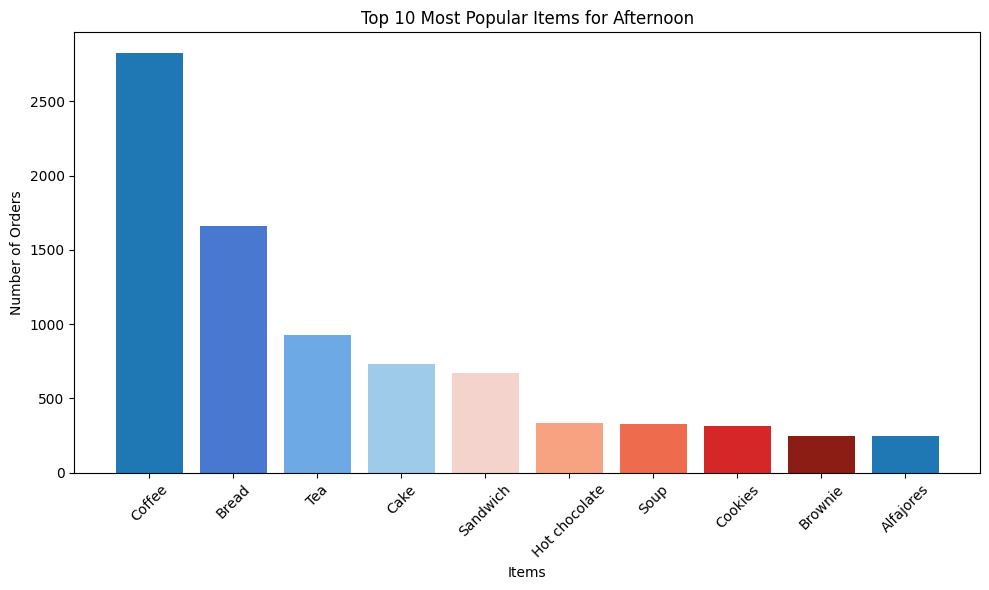

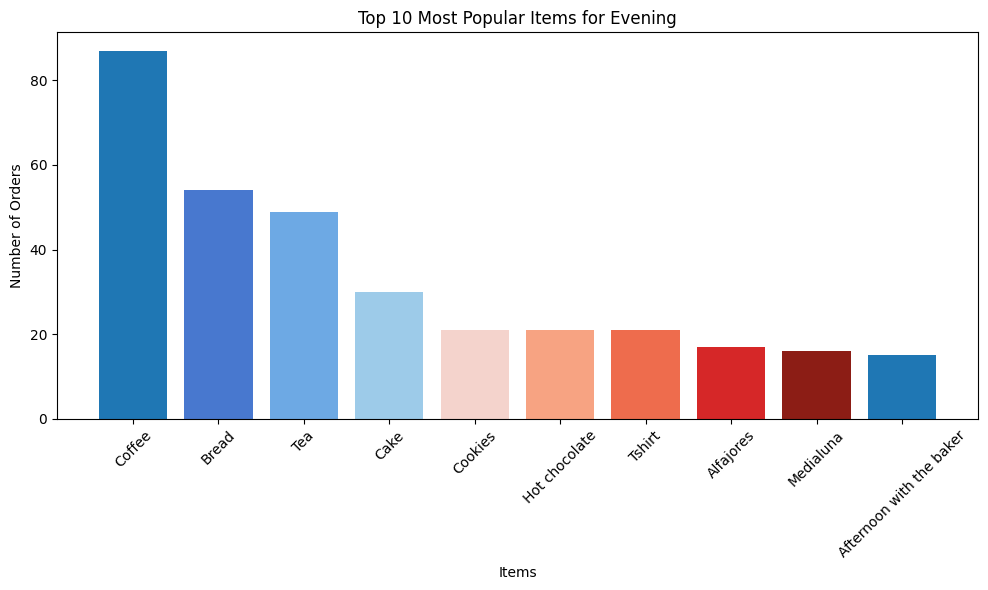

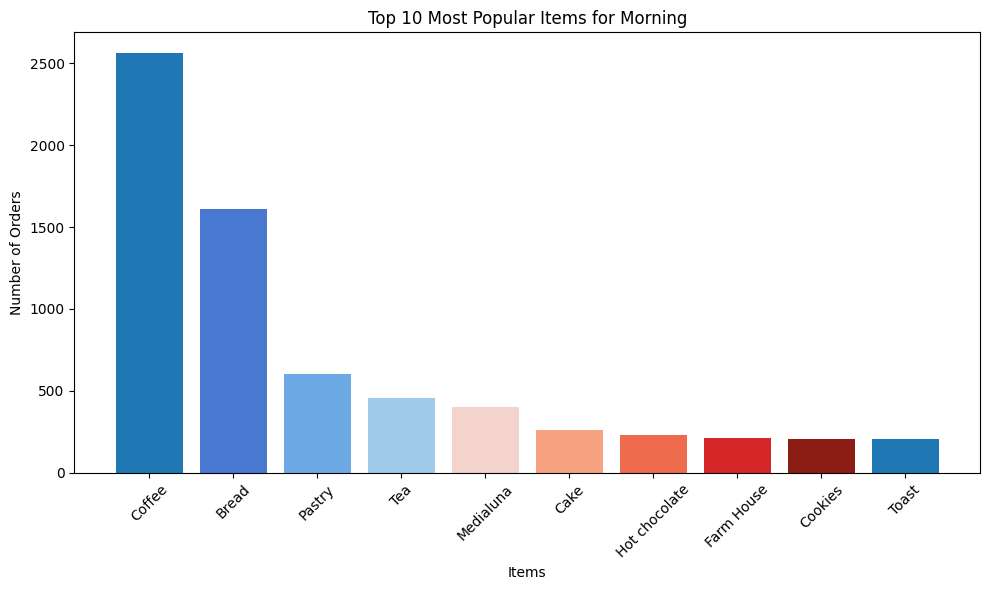

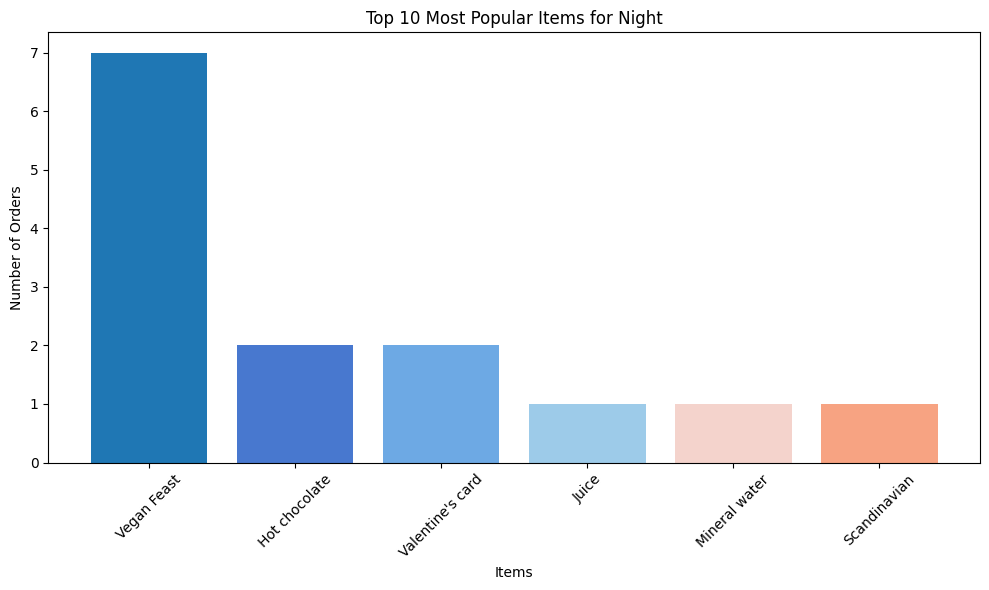

In [17]:
# 20
color_palette = ['#1f77b4', '#4878cf', '#6da9e4', '#9dcbe9', '#f4d3cc',
                 '#f7a382', '#ee6c4d', '#d62728', '#8c1d15']

item_counts_by_period = df.groupby(['period_day', 'Item']).size().reset_index(name='count')

top_items_by_period = item_counts_by_period.groupby('period_day').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

periods = top_items_by_period['period_day'].unique()

for period in periods:
    data = top_items_by_period[top_items_by_period['period_day'] == period]

    plt.figure(figsize=(10, 6))

    colors = color_palette[:len(data)]

    plt.bar(data['Item'], data['count'], color=colors)

    plt.xlabel('Items')
    plt.ylabel('Number of Orders')
    plt.title(f'Top 10 Most Popular Items for {period.capitalize()}')

    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


21. It turns out that there is something different in the plot above, the insight is ____


The insight is that coffee remains the most sold item during all periods of the day, particularly dominating the morning sales. However, other items such as bread and pastries also see significant sales, whereas desserts and smaller snacks like cookies or brownies gain more attention during the afternoon. This suggests that customer preferences shift slightly depending on the time of day, with mornings favoring staples and afternoons leaning toward indulgent treats.

I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-18-f04462fe0f58>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date


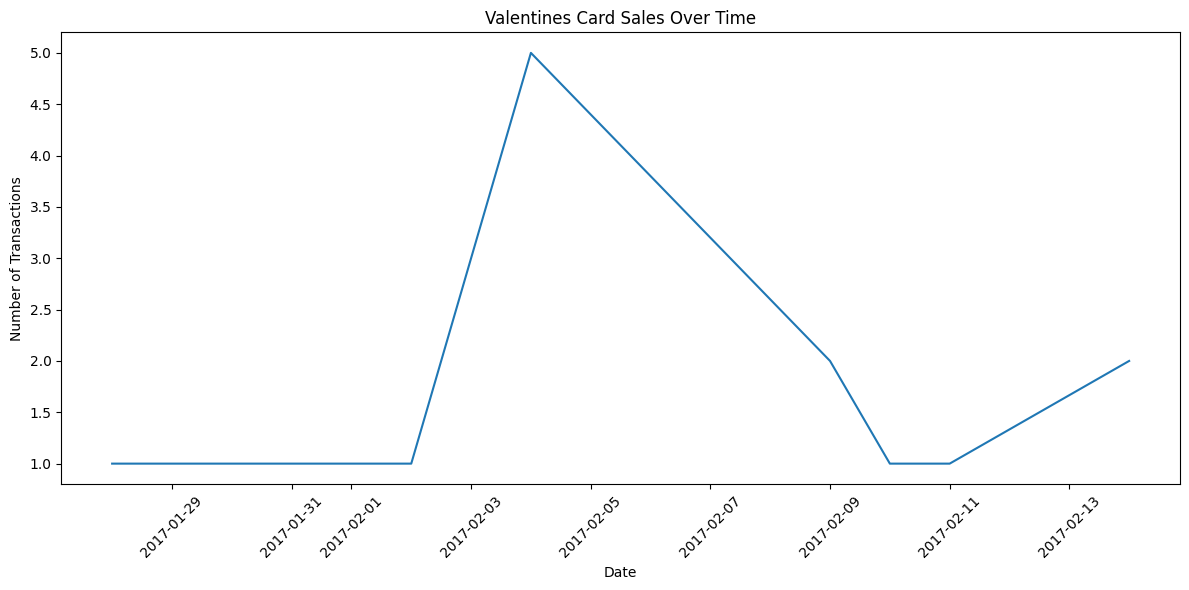

In [18]:
valentine_sales = df[df['Item'].str.contains('Valentine', case=False, na=False)]

valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date
sales_by_date = valentine_sales.groupby('date').size()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, linestyle='-', label='Valentine Card Sales')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Valentines Card Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

23. I found the insight from the sale of the Valentine's cards above is ____


I found the insight from the sale of the Valentine’s cards above is that sales peaked in early February, likely a few days before Valentine’s Day on February 14. This suggests that most customers tend to purchase Valentine’s cards close to the celebration date. After reaching the peak, there is a sharp decline in sales, reflecting the decreased demand as Valentine’s Day approaches or passes. Additionally, a slight rise in transactions toward the end might indicate late purchases or residual interest. This pattern highlights a clear seasonal trend in the sales of Valentine’s cards.



## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [6]:
# 24
one_hot_encoded_df = df.pivot_table(
    index='Transaction',
    columns='Item',
    aggfunc=lambda x: 1,
    fill_value=0
)

one_hot_encoded_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


date_time                                                     \
Item        Adjustment Afternoon with the baker Alfajores Argentina Night   
Transaction                                                                 
1                    0                        0         0               0   
2                    0                        0         0               0   
3                    0                        0         0               0   
4                    0                        0         0               0   
5                    0                        0         0               0   

                                                                  ...  \
Item        Art Tray Bacon Baguette Bakewell Bare Popcorn Basket  ...   
Transaction                                                       ...   
1                  0     0        0        0            0      0  ...   
2                  0     0        0        0            0      0  ...   
3                  0     0        0        0            0      0  ...   
4                  0     0        0        0            0      0  ...   
5                  0     0        0        0            0      0  ...   

            weekday_weekend                                         \
Item               The BART The Nomad Tiffin Toast Truffles Tshirt   
Transaction                                                          
1                         0         0      0     0        0      0   
2                         0         0      0     0        0      0   
3                         0         0      0     0        0      0   
4                         0         0      0     0        0      0   
5                         0         0      0     0        0      0   

                                                                          
Item        Valentine's card Vegan Feast Vegan mincepie Victorian Sponge  
Transaction                                                               
1                          0           0              0                0  
2                          0           0              0                0  
3                          0           0              0                0  
4                          0           0              0                0  
5                          0           0              0                0  

[5 rows x 282 columns]

In [7]:
#25
# Convert quantities to 1 and 0
transaction_data = one_hot_encoded_df.applymap(lambda x: 1 if x > 0 else 0)

display(transaction_data.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-7-cfe350eb4fd4>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transaction_data = one_hot_encoded_df.applymap(lambda x: 1 if x > 0 else 0)


date_time                                                     \
Item        Adjustment Afternoon with the baker Alfajores Argentina Night   
Transaction                                                                 
1                    0                        0         0               0   
2                    0                        0         0               0   
3                    0                        0         0               0   
4                    0                        0         0               0   
5                    0                        0         0               0   

                                                                  ...  \
Item        Art Tray Bacon Baguette Bakewell Bare Popcorn Basket  ...   
Transaction                                                       ...   
1                  0     0        0        0            0      0  ...   
2                  0     0        0        0            0      0  ...   
3                  0     0        0        0            0      0  ...   
4                  0     0        0        0            0      0  ...   
5                  0     0        0        0            0      0  ...   

            weekday_weekend                                         \
Item               The BART The Nomad Tiffin Toast Truffles Tshirt   
Transaction                                                          
1                         0         0      0     0        0      0   
2                         0         0      0     0        0      0   
3                         0         0      0     0        0      0   
4                         0         0      0     0        0      0   
5                         0         0      0     0        0      0   

                                                                          
Item        Valentine's card Vegan Feast Vegan mincepie Victorian Sponge  
Transaction                                                               
1                          0           0              0                0  
2                          0           0              0                0  
3                          0           0              0                0  
4                          0           0              0                0  
5                          0           0              0                0  

[5 rows x 282 columns]

### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [8]:
# 26
frequent_itemsets = apriori(one_hot_encoded_df, min_support=0.02, use_colnames=True)

frequent_itemsets_df = frequent_itemsets[['support', 'itemsets']]

frequent_itemsets_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,"((date_time, Alfajores))"
1,0.327205,"((date_time, Bread))"
2,0.040042,"((date_time, Brownie))"
3,0.103856,"((date_time, Cake))"
4,0.478394,"((date_time, Coffee))"
...,...,...
814,0.035182,"((period_day, Medialuna), (weekday_weekend, Me..."
815,0.047544,"((weekday_weekend, Pastry), (weekday_weekend, ..."
816,0.038246,"((weekday_weekend, Sandwich), (date_time, Sand..."
817,0.049868,"((period_day, Tea), (weekday_weekend, Coffee),..."


In [9]:
# 27
frequent_itemsets = apriori(one_hot_encoded_df, min_support=0.02, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"((date_time, Alfajores))","((period_day, Alfajores))",0.036344,0.036344,0.036344,1.000000,27.514535,0.035024,inf,1.00000
1,"((period_day, Alfajores))","((date_time, Alfajores))",0.036344,0.036344,0.036344,1.000000,27.514535,0.035024,inf,1.00000
2,"((weekday_weekend, Alfajores))","((date_time, Alfajores))",0.036344,0.036344,0.036344,1.000000,27.514535,0.035024,inf,1.00000
3,"((date_time, Alfajores))","((weekday_weekend, Alfajores))",0.036344,0.036344,0.036344,1.000000,27.514535,0.035024,inf,1.00000
4,"((date_time, Pastry))","((date_time, Bread))",0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.03698
...,...,...,...,...,...,...,...,...,...,...
7923,"((date_time, Toast))","((weekday_weekend, Toast), (weekday_weekend, C...",0.033597,0.023666,0.023666,0.704403,29.764151,0.022871,3.302917,1.00000
7924,"((weekday_weekend, Coffee))","((weekday_weekend, Toast), (date_time, Toast),...",0.478394,0.023666,0.023666,0.049470,2.090327,0.012344,1.027147,1.00000
7925,"((date_time, Coffee))","((weekday_weekend, Toast), (date_time, Toast),...",0.478394,0.023666,0.023666,0.049470,2.090327,0.012344,1.027147,1.00000
7926,"((period_day, Toast))","((weekday_weekend, Toast), (date_time, Toast),...",0.033597,0.023666,0.023666,0.704403,29.764151,0.022871,3.302917,1.00000


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



As my day of analysis concludes, I summarize my findings into a detailed report that highlights several crucial insights drawn from The Bread Basket dataset:

**Transaction Trends:**
The daily transaction trends reveal that the bakery experiences its highest sales during weekends (Saturday and Sunday), which aligns with the fact that people tend to have more leisure time on these days and often incorporate bakery products into their routines. The bakery is busiest between 10 AM and 12 PM, indicating that customers frequently visit for morning or midday snacks or to purchase bread for meals. Sales generally increase toward the end of the year, likely influenced by the holiday season and festivities.

**Product Popularity:**
The most popular items include Coffee, Bread, and Tea, reflecting the bakery's core offerings and customers' preference for these staple products. The popularity of items such as Coffee, Bread, Tea, and Pastries remains consistent throughout various periods of the day (morning, afternoon, evening, night), suggesting that customer preferences for these items are not time-dependent. However, in the afternoon, sales of products like Cake, Hot Chocolate, and Cookies are notably higher, indicating that these products are favored as afternoon snacks. Valentine’s Cards see a spike in sales during February, particularly around February 14th (Valentine’s Day), likely due to the nature of the product.

**Product Associations (Apriori Algorithm):**
The Apriori algorithm reveals strong associations between products commonly purchased together. For example, Coffee and Toast are frequently bought together, as indicated by the high lift values. Other associations include Coffee with Medialuna, Pastries, and Cake. These insights can help in crafting bundle offers or promotions that encourage customers to buy these items together.

**Recommendations:**
Based on these insights, here are several recommendations for the bakery:

1. Staffing and Inventory Management: Adjust staffing levels and stock to meet the higher demand during peak hours (10 AM to 12 PM) and weekends.
2. Promotions: Consider offering bundle deals or discounts on popular combinations, such as Coffee and Toast, to increase overall sales.
3. Product Focus: Continue focusing on core products like Coffee, Bread, Tea, and Pastries while ensuring adequate inventory to fulfill consistent demand.
4. Seasonal and Event-based Promotions: Take advantage of holidays and special events like Valentine’s Day by launching targeted campaigns and offers to boost sales.
5. Afternoon Snack Options: Promote afternoon favorites like Cookies, Cake, and Hot Chocolate to cater to customers' afternoon snack cravings.

By utilizing these data-driven insights and implementing these strategies, the bakery can optimize its product offerings, improve operational efficiency, and elevate customer satisfaction.